<a href="https://colab.research.google.com/github/R786P/data-science-roadmap-2025_2026/blob/main/14_deep_learning_basics/01_ann_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygit2==1.15.1
%cd /content
!git clone https://github.com/lllyasviel/Fooocus.git
%cd /content/Fooocus
!python entry_with_update.py --share --always-high-vram

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🧠 Training Neural Network...

✅ Test Accuracy: 0.80


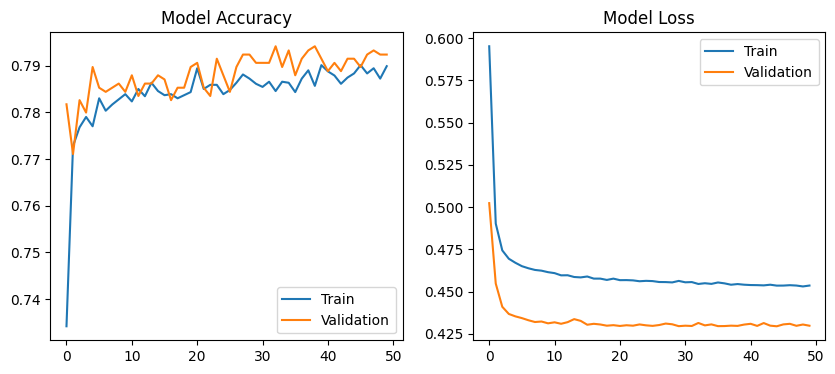

In [14]:
# 14_deep_learning_basics/01_ann_keras.ipynb
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Load data
df = pd.read_csv("https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv")

# ✅ FIX: Handle TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Prep features
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']].values
y = df['Churn'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build ANN
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(3,)))  # Input layer
model.add(Dense(8, activation='relu'))                     # Hidden layer
model.add(Dense(1, activation='sigmoid'))                  # Output layer

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
print("🧠 Training Neural Network...")
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.2f}")

# Plot training history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()
plt.show()